<a href="https://colab.research.google.com/github/kim-hyun-ho/study/blob/main/210412.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
#독버섯 실습

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

mushroom = pd.read_csv('/content/drive/MyDrive/mushrooms.csv')
mushroom

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


In [24]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [25]:
from sklearn.preprocessing import LabelEncoder

Labelencoder = LabelEncoder()
for col in mushroom.columns:
    mushroom[col] = Labelencoder.fit_transform(mushroom[col])

mushroom

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,0,0,2,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,1,0,2,1,7,7,0,2,1,0,7,4,2


[Text(0, 0.5, 'No of nuique elements'),
 Text(0.5, 0, 'Features'),
 Text(0.5, 1.0, 'Unique elements per column')]

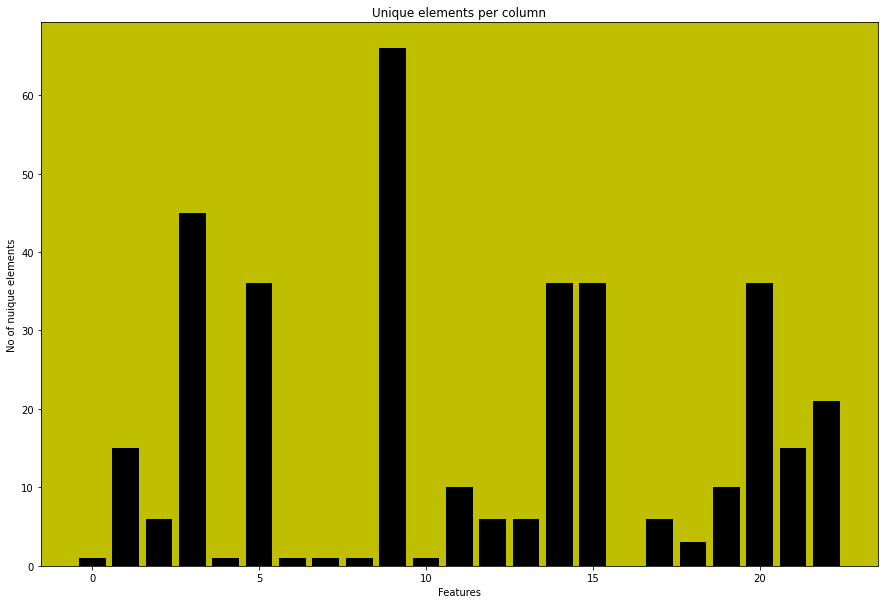

In [26]:
count_var=[]
for col in mushroom.columns:
    count_var.append(mushroom[col].unique().sum())
size = np.arange(len(count_var))

fig=plt.figure(figsize=(15,10))
ax=fig.add_subplot(1,1,1,facecolor='y')
ax.bar(size,count_var,color='k')
ax.set(title='Unique elements per column',
       ylabel='No of nuique elements',
       xlabel='Features')

In [27]:
mushroom.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,-0.102019,-0.379361,-0.334593,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,0.063794,0.030191,-0.030417,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,-0.014123,-0.126245,0.089090,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,-0.456496,0.321274,-0.060837,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,0.099364,0.244188,0.460824,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,0.459766,-0.205215,0.118617,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,0.186485,0.144063,-0.088916,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,0.080895,0.350548,-0.212359,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,0.214576,-0.344345,0.056310,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,-0.175699,0.315080,0.224287,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


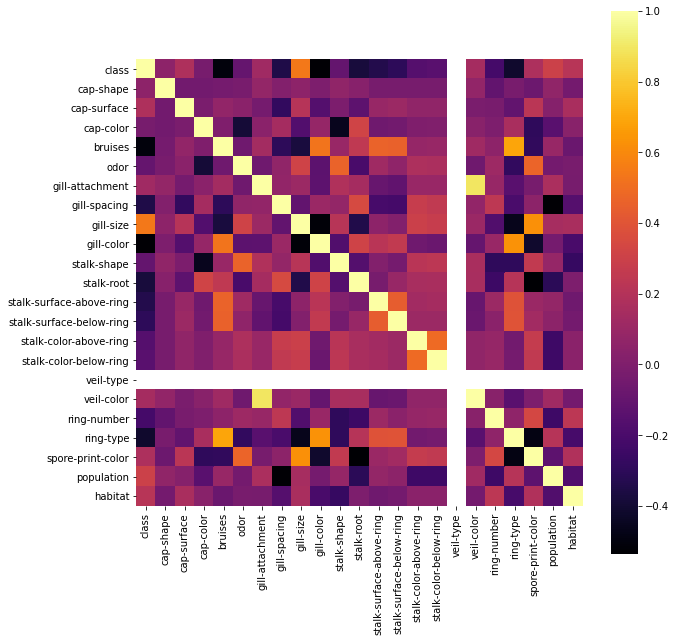

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(mushroom.corr(),cmap='inferno',square=True)

In [29]:
target = mushroom['class']
train = mushroom.drop('class',axis=1)

Text(0.5, 1.0, 'Class distribution')

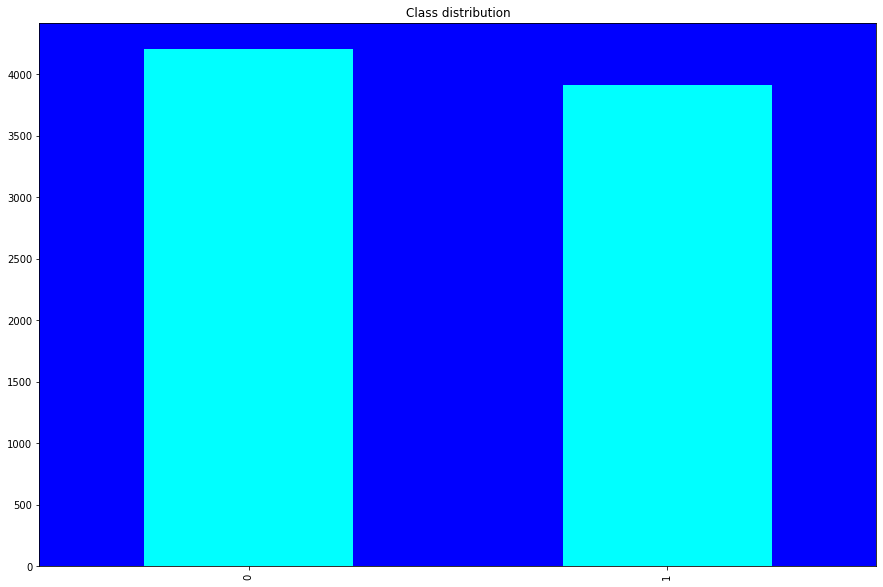

In [30]:
fig=plt.figure(figsize=(15,10))
ax=fig.add_subplot(1,1,1,facecolor='blue')
pd.value_counts(target).plot(kind='bar',cmap='cool')
plt.title('Class distribution')

In [31]:
def sigmoid(theta,X):
    X = np.array(X)
    theta = np.asarray(theta)
    return((1/(1+math.e**(-X.dot(theta)))))

# https://studymake.tistory.com/406 
# https://appia.tistory.com/150
# np.asarray 참고

In [44]:
def cost(theta, X, Y):
    first = np.multiply(-Y, np.log(sigmoid(theta,X)))
    second = np.multiply((1 -Y), np.log(1-sigmoid(theta,X)))
    return np.sum(first-second)/(len(X))

In [47]:
def log_gradient(theta,X,Y):
    first_calc = sigmoid(theta,X)-np.squeeze(Y).T
    final_calc = first_calc.T.dot(X)
    return(final_calc.T)


In [42]:
def gradient_Descent(theta,X,Y,itr_val,learning_rate=0.00001):
    cost_iter=[]
    cost_val=cost(theta,X,Y)
    cost_iter.append([0,cost_val])
    change_cost =1
    itr =0
    while(itr < itr_val):
        old_cost = cost_val
        theta = theta - (0.01 * log_gradient(theta,X,Y))
        cost_val = cost(theta,X,Y)
        cost_iter.append([i,cost])
        itr+=1
    return theta


In [35]:
def pred_values(theta,X,hard=True):
    X = (X - np.mean(X,axis=0))/np.std(X,axis=0)
    pred_prob = sigmoid(theta,X)
    pred_value = np.where(pred_prob >= 0.5, 1, 0)
    return pred_value

In [36]:
theta = np.zeros((train.shape)[1])
theta = np.asmatrix(theta)
theta = theta.T
target = np.asmatrix(target).T
y_test = list(target)

In [48]:
import math
params = [10,20,30,50,100]
for i in range(len(params)):
    th = gradient_Descent(theta,train,target,params[i])
    y_pred = list(pred_values(th,train))
    score=float(sum(1 for x,y in zip(y_pred,y_test) if x == y)) /len(y_pred)
    print(f'The accuracy after {params[i]} iterations is {score}')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in power
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


The accuracy after 10 iterations is 0.517971442639094
The accuracy after 20 iterations is 0.517971442639094
The accuracy after 30 iterations is 0.517971442639094
The accuracy after 50 iterations is 0.517971442639094
The accuracy after 100 iterations is 0.517971442639094


In [49]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(train,target)
clf.score(train,target)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9519940915805022

#성능지표
<pre>
          예측정상  예측 불량
실제 정상    진양      위음
실제 불량    위양      진음

정확도 : 전체중 실제값
= 전체분에 대각선 맞은것 맞다, 틀린거 틀리다
= 진양+진음/위양+진양+위음+진음

정밀도 : 예측 중에 진양
= 맞다고 예측한 것중 맞은거 (예측 기준)
= 진양 / 위양+진양

재현율 : 감도
= 실제 중에 참을 맞춤 ( 실제 기준)
= 진양 / 진양+위음

특이도
= 실제 중에 거짓을 맞춤  ( 실제 기준)
= 진음 / 진음+위양
